In [1]:
import tensorflow.keras as keras
import tensorflow.keras.models
from tensorflow.keras.layers import (Input, Activation, BatchNormalization, Flatten,
                                     Conv2D, MaxPooling2D, Dense, Dropout)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot as plt
import pydot

In [2]:
physical_devices = tensorflow.config.list_physical_devices('GPU')
tensorflow.config.experimental.set_memory_growth(physical_devices[0], True)

X_Input = Input((288, 432, 4))

X = Conv2D(8, kernel_size=(3, 3), strides=(1, 1))(X_Input)
X = BatchNormalization(axis=3)(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Conv2D(16, kernel_size=(3, 3), strides=(1, 1))(X)
X = BatchNormalization(axis=3)(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1))(X)
X = BatchNormalization(axis=3)(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1))(X)
X = BatchNormalization(axis=-1)(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1))(X)
X = BatchNormalization(axis=-1)(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

X = Dropout(rate=0.3)(X)

X = Dense(8, activation='softmax', name='fc' + str(8))(X)

model = Model(inputs=X_Input, outputs=X, name='GenreModel')
print(model.summary())
opt = Adam(learning_rate=0.0001)
keras.utils.plot_model(model, to_file="./model/Model_architecture.jpg")

Model: "GenreModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 288, 432, 4)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 286, 430, 8)       296       
_________________________________________________________________
batch_normalization (BatchNo (None, 286, 430, 8)       32        
_________________________________________________________________
activation (Activation)      (None, 286, 430, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 143, 215, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 141, 213, 16)      1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 141, 213, 16)      6

In [3]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory("./spectrogram3sec/train/",
                                                    target_size=(288, 432),
                                                    color_mode="rgba",
                                                    class_mode='categorical',
                                                    batch_size=64)
val_datagen = ImageDataGenerator(rescale=1. / 255)
val_generator = val_datagen.flow_from_directory("./spectrogram3sec/test/",
                                                target_size=(288, 432),
                                                color_mode="rgba",
                                                class_mode='categorical',
                                                batch_size=64)



Found 63952 images belonging to 8 classes.
Found 15988 images belonging to 8 classes.


In [4]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('./model/model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=val_generator,
                    shuffle=True,
                    callbacks=[es, mc])

Epoch 1/100
1000/1000 [==============================] - ETA: 0s - loss: 1.9562 - accuracy: 0.2971
Epoch 00001: val_accuracy improved from -inf to 0.38373, saving model to ./model/model.h5
1000/1000 [==============================] - 296s 296ms/step - loss: 1.9562 - accuracy: 0.2971 - val_loss: 1.6829 - val_accuracy: 0.3837
Epoch 2/100
1000/1000 [==============================] - ETA: 0s - loss: 1.7235 - accuracy: 0.3764
Epoch 00002: val_accuracy improved from 0.38373 to 0.39292, saving model to ./model/model.h5
1000/1000 [==============================] - 284s 284ms/step - loss: 1.7235 - accuracy: 0.3764 - val_loss: 1.6370 - val_accuracy: 0.3929
Epoch 3/100
1000/1000 [==============================] - ETA: 0s - loss: 1.6267 - accuracy: 0.4124
Epoch 00003: val_accuracy improved from 0.39292 to 0.43752, saving model to ./model/model.h5
1000/1000 [==============================] - 283s 283ms/step - loss: 1.6267 - accuracy: 0.4124 - val_loss: 1.5656 - val_accuracy: 0.4375
Epoch 4/100
1000

1000/1000 [==============================] - ETA: 0s - loss: 0.9506 - accuracy: 0.6672
Epoch 00027: val_accuracy did not improve from 0.60783
1000/1000 [==============================] - 281s 281ms/step - loss: 0.9506 - accuracy: 0.6672 - val_loss: 1.1226 - val_accuracy: 0.6061
Epoch 28/100
1000/1000 [==============================] - ETA: 0s - loss: 0.9356 - accuracy: 0.6724
Epoch 00028: val_accuracy did not improve from 0.60783
1000/1000 [==============================] - 280s 280ms/step - loss: 0.9356 - accuracy: 0.6724 - val_loss: 1.2263 - val_accuracy: 0.5686
Epoch 29/100
1000/1000 [==============================] - ETA: 0s - loss: 0.9219 - accuracy: 0.6779
Epoch 00029: val_accuracy did not improve from 0.60783
1000/1000 [==============================] - 281s 281ms/step - loss: 0.9219 - accuracy: 0.6779 - val_loss: 1.1541 - val_accuracy: 0.6011
Epoch 30/100
1000/1000 [==============================] - ETA: 0s - loss: 0.9025 - accuracy: 0.6856
Epoch 00030: val_accuracy improved fr

1000/1000 [==============================] - ETA: 0s - loss: 0.6471 - accuracy: 0.7728
Epoch 00054: val_accuracy did not improve from 0.64623
1000/1000 [==============================] - 283s 283ms/step - loss: 0.6471 - accuracy: 0.7728 - val_loss: 1.1403 - val_accuracy: 0.6162
Epoch 55/100
1000/1000 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.7754
Epoch 00055: val_accuracy did not improve from 0.64623
1000/1000 [==============================] - 283s 283ms/step - loss: 0.6356 - accuracy: 0.7754 - val_loss: 1.1194 - val_accuracy: 0.6237
Epoch 56/100
1000/1000 [==============================] - ETA: 0s - loss: 0.6303 - accuracy: 0.7791
Epoch 00056: val_accuracy did not improve from 0.64623
1000/1000 [==============================] - 283s 283ms/step - loss: 0.6303 - accuracy: 0.7791 - val_loss: 1.2079 - val_accuracy: 0.6127
Epoch 57/100
1000/1000 [==============================] - ETA: 0s - loss: 0.6226 - accuracy: 0.7814
Epoch 00057: val_accuracy improved fr

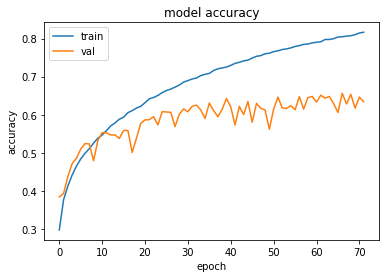

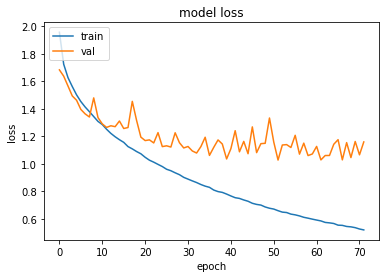

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [7]:
saved_model = tensorflow.keras.models.load_model("./model/model.h5")
_, train_acc = saved_model.evaluate(train_generator, verbose=0)
_, val_acc = saved_model.evaluate(val_generator, verbose=0)
print(f'Train accuracy: {train_acc}')
print(f'Validation accuracy: {val_acc}')


Train accuracy: 0.8838503956794739
Validation accuracy: 0.6561170816421509
